# Read sea ice data and orbital parameters

In [4]:
import pandas as pd


file_path = 'D:/Matlab_code/EBM_NH_SH_sea_ice/'


# Replace these paths with the actual paths to your CSV files
nh_csv_file_path = file_path+'results_nh_n400_age0to200ka_20240208_0853.csv'
sh_csv_file_path = file_path+'results_sh_n400_age0to200ka_20240208_0853.csv'

# Read the CSV files
results_nh_df = pd.read_csv(nh_csv_file_path)
results_sh_df = pd.read_csv(sh_csv_file_path)

# rename columns to 'age' 'T' and 'iceA'
results_nh_df.columns = ['age', 'T', 'iceA']
results_sh_df.columns = ['age', 'T', 'iceA']

delta_age=0
# correct the age
results_nh_df['age'] = results_nh_df['age'] - delta_age
results_sh_df['age'] = results_sh_df['age'] - delta_age

# Display the first few rows of the dataframes to verify
print("Northern Hemisphere Data:")
print(results_nh_df.head())

print("\nSouthern Hemisphere Data:")
print(results_sh_df.head())

# load orbital parameters
path='D:/VScode/EBM_NH_SH_sea_ice/orb_paras/'
df_ecc=pd.read_csv(path+'df_ecc.csv')
df_pre=pd.read_csv(path+'df_pre.csv')
df_obl=pd.read_csv(path+'df_obl.csv')

# age /1000
df_ecc['age']=df_ecc['age']/1000
df_pre['age']=df_pre['age']/1000
df_obl['age']=df_obl['age']/1000

# # # # crop the orbital parameters for age<=200
# df_ecc=df_ecc[df_ecc['age']<=200]
# df_pre=df_pre[df_pre['age']<=200]
# df_obl=df_obl[df_obl['age']<=200]



Northern Hemisphere Data:
   age         T       iceA
0    0 -2.219309  39.244653
1    1 -2.174976  39.108855
2    2 -2.103703  38.875226
3    3 -2.037491  38.649002
4    4 -1.987833  38.492145

Southern Hemisphere Data:
   age         T       iceA
0    0 -2.046091  38.591894
1    1 -1.977503  38.337109
2    2 -1.913669  38.115079
3    3 -1.863503  37.942339
4    4 -1.824006  37.804674


# Calculating the PSD

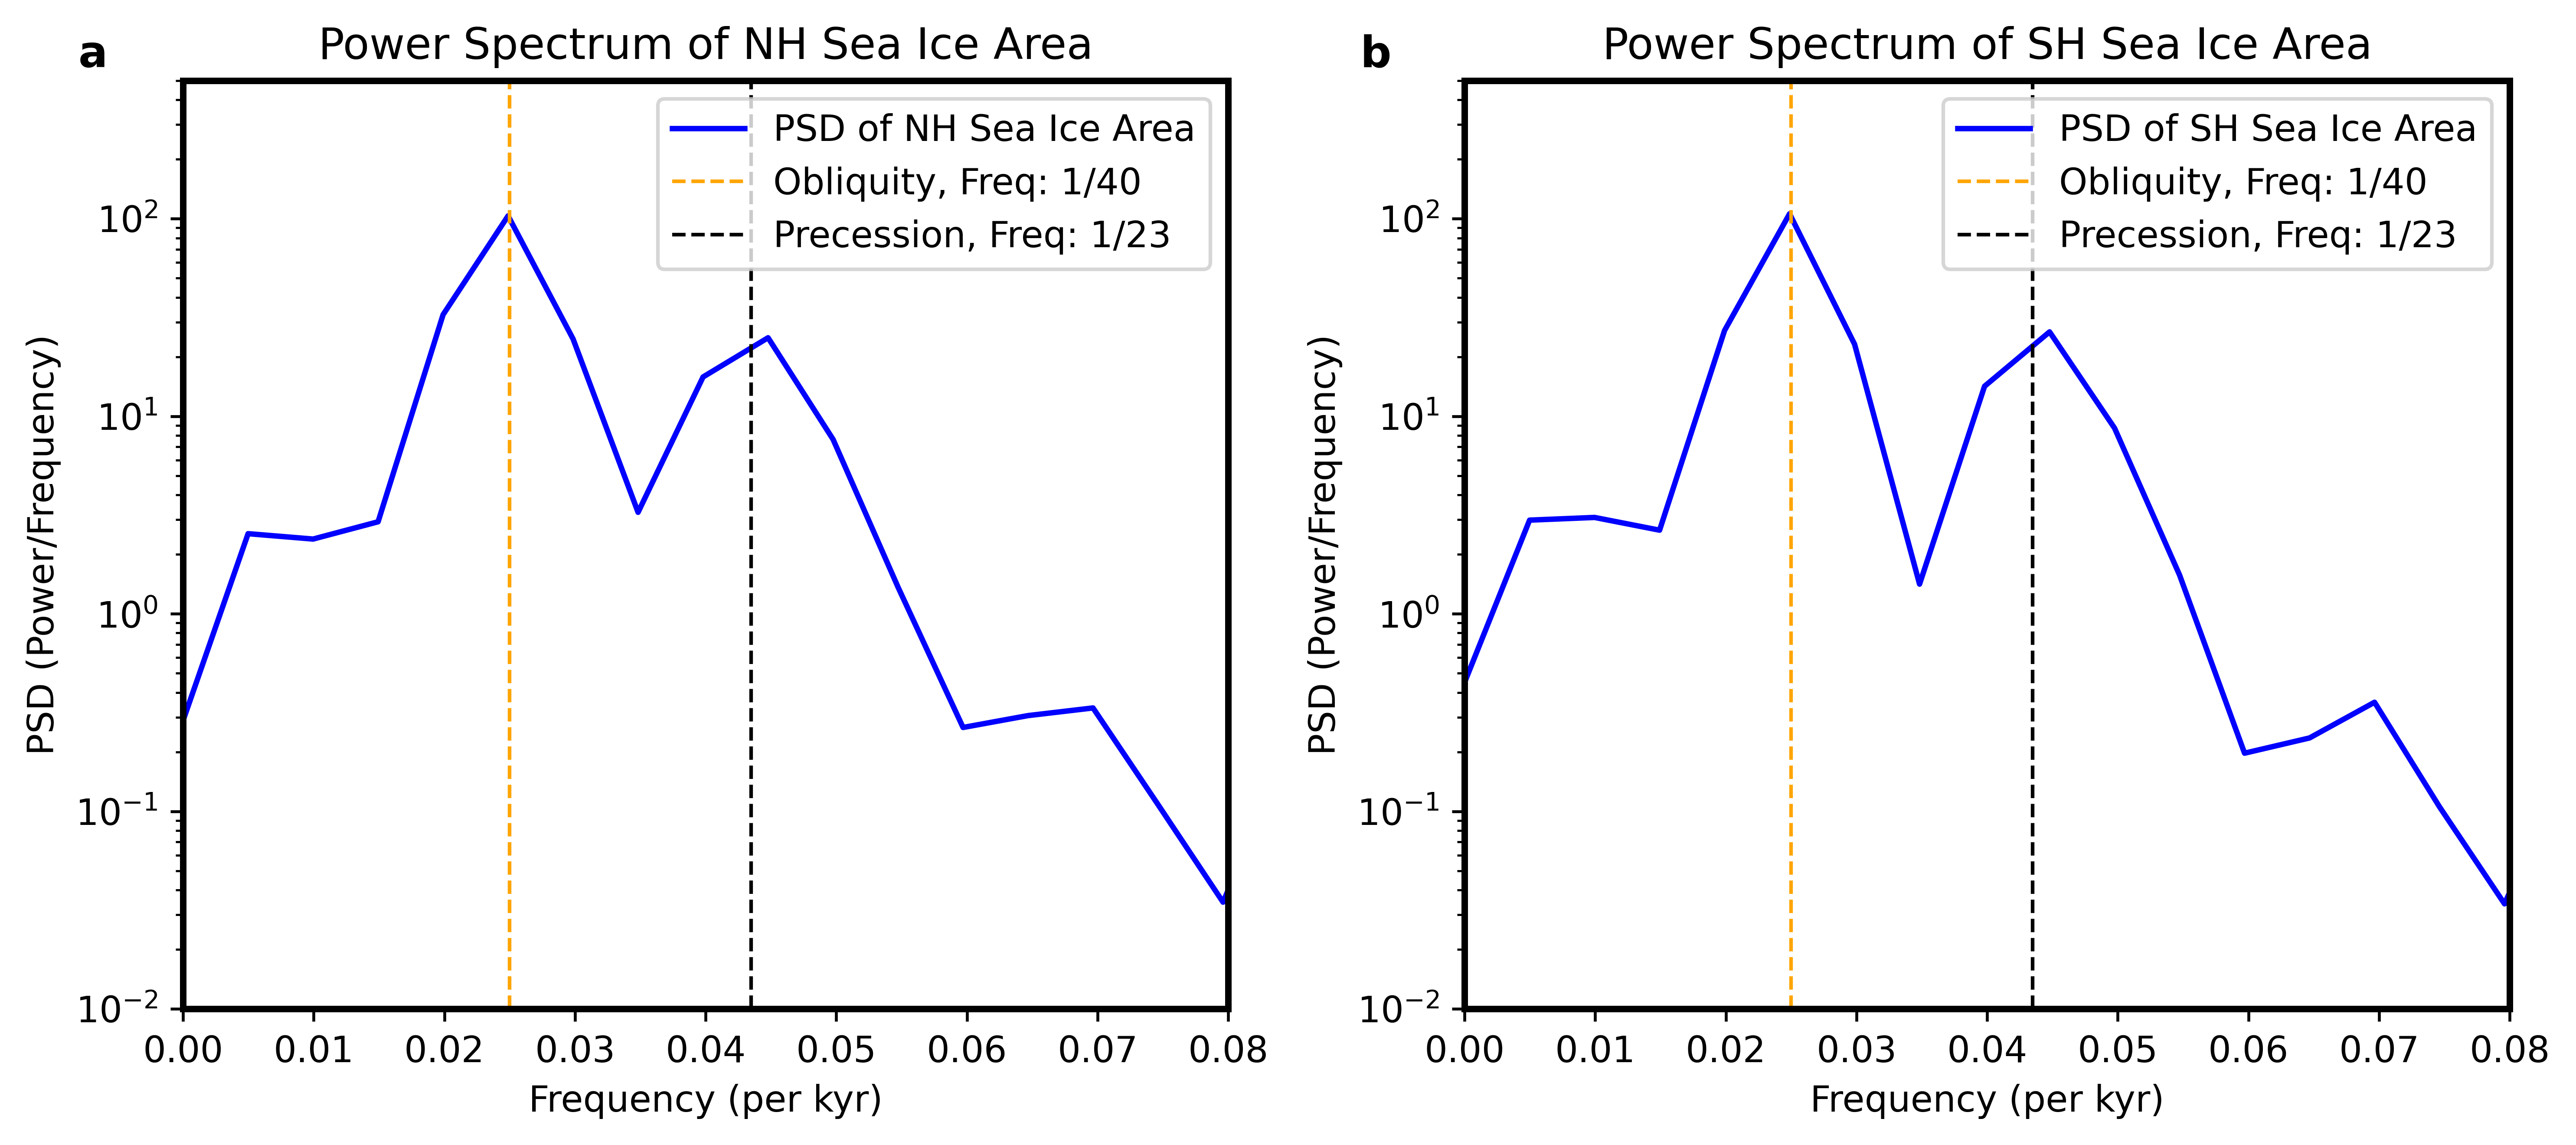

In [7]:
from scipy.signal import welch
from scipy.stats import zscore
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'results_nh_df' and 'results_sh_df' are defined elsewhere and contain the sea ice area data

# Setting the sampling frequency to 1 (assuming data points represent equal time intervals, e.g., kyr)
fs = 1  # Sampling frequency

# Using nperseg=100 for reasonable frequency resolution and averaging
nperseg = len(results_nh_df['iceA'])
# Setting noverlap to 50 for 50% overlap between segments
noverlap = 0

# Calculating power spectra for NH and SH sea ice areas using Welch's method
f_nh, Pxx_den_nh = welch(zscore(results_nh_df['iceA']), fs, nperseg=nperseg, noverlap=noverlap)
f_sh, Pxx_den_sh = welch(zscore(results_sh_df['iceA']), fs, nperseg=nperseg, noverlap=noverlap)

# Creating figure for the power spectra plots
fig, axs = plt.subplots(1,2, figsize=(10, 4.5),dpi=600)

# Plotting power spectrum for NH sea ice area on the left
axs[0].semilogy(f_nh, Pxx_den_nh, label='PSD of NH Sea Ice Area', color='blue')
axs[0].set_title('Power Spectrum of NH Sea Ice Area')
axs[0].set_xlabel('Frequency (per kyr)')
axs[0].set_ylabel('PSD (Power/Frequency)')
axs[0].set_xlim(0, 0.08)
# set ylim
axs[0].set_ylim(0.01,500)

# Adding vertical lines at specific frequencies

axs[0].axvline(x=1/40, color='orange', linestyle='--', linewidth=1, label='Obliquity, Freq: 1/40')
axs[0].axvline(x=1/23, color='k', linestyle='--', linewidth=1, label='Precession, Freq: 1/23')
axs[0].legend()

# # get the xticklabels and convert it to 1/xticklabels and set the xticklabels back
# xticks = axs[0].get_xticks()
# xticklabels = [1/x for x in xticks]
# axs[0].set_xticklabels(xticklabels)

# Plotting power spectrum for SH sea ice area on the right
axs[1].semilogy(f_sh, Pxx_den_sh, label='PSD of SH Sea Ice Area', color='blue')
axs[1].set_title('Power Spectrum of SH Sea Ice Area')
axs[1].set_xlabel('Frequency (per kyr)')
axs[1].set_ylabel('PSD (Power/Frequency)')
axs[1].set_xlim(0, 0.08)
# set ylim
axs[1].set_ylim(0.01,500)

# Adding vertical lines at specific frequencies
axs[1].axvline(x=1/40, color='orange', linestyle='--', linewidth=1, label='Obliquity, Freq: 1/40')
axs[1].axvline(x=1/23, color='k', linestyle='--', linewidth=1, label='Precession, Freq: 1/23')

# set the linewidth of boxes
for axis in ['top','bottom','left','right']:
  axs[0].spines[axis].set_linewidth(1.8)
  axs[1].spines[axis].set_linewidth(1.8)

axs[1].legend()

# add text a, and b to the subplots
axs[0].text(-0.1, 1.05, 'a', transform=axs[0].transAxes, fontsize=12, fontweight='bold', va='top')
axs[1].text(-0.1, 1.05, 'b', transform=axs[1].transAxes, fontsize=12, fontweight='bold', va='top')

plt.tight_layout()
plt.show()


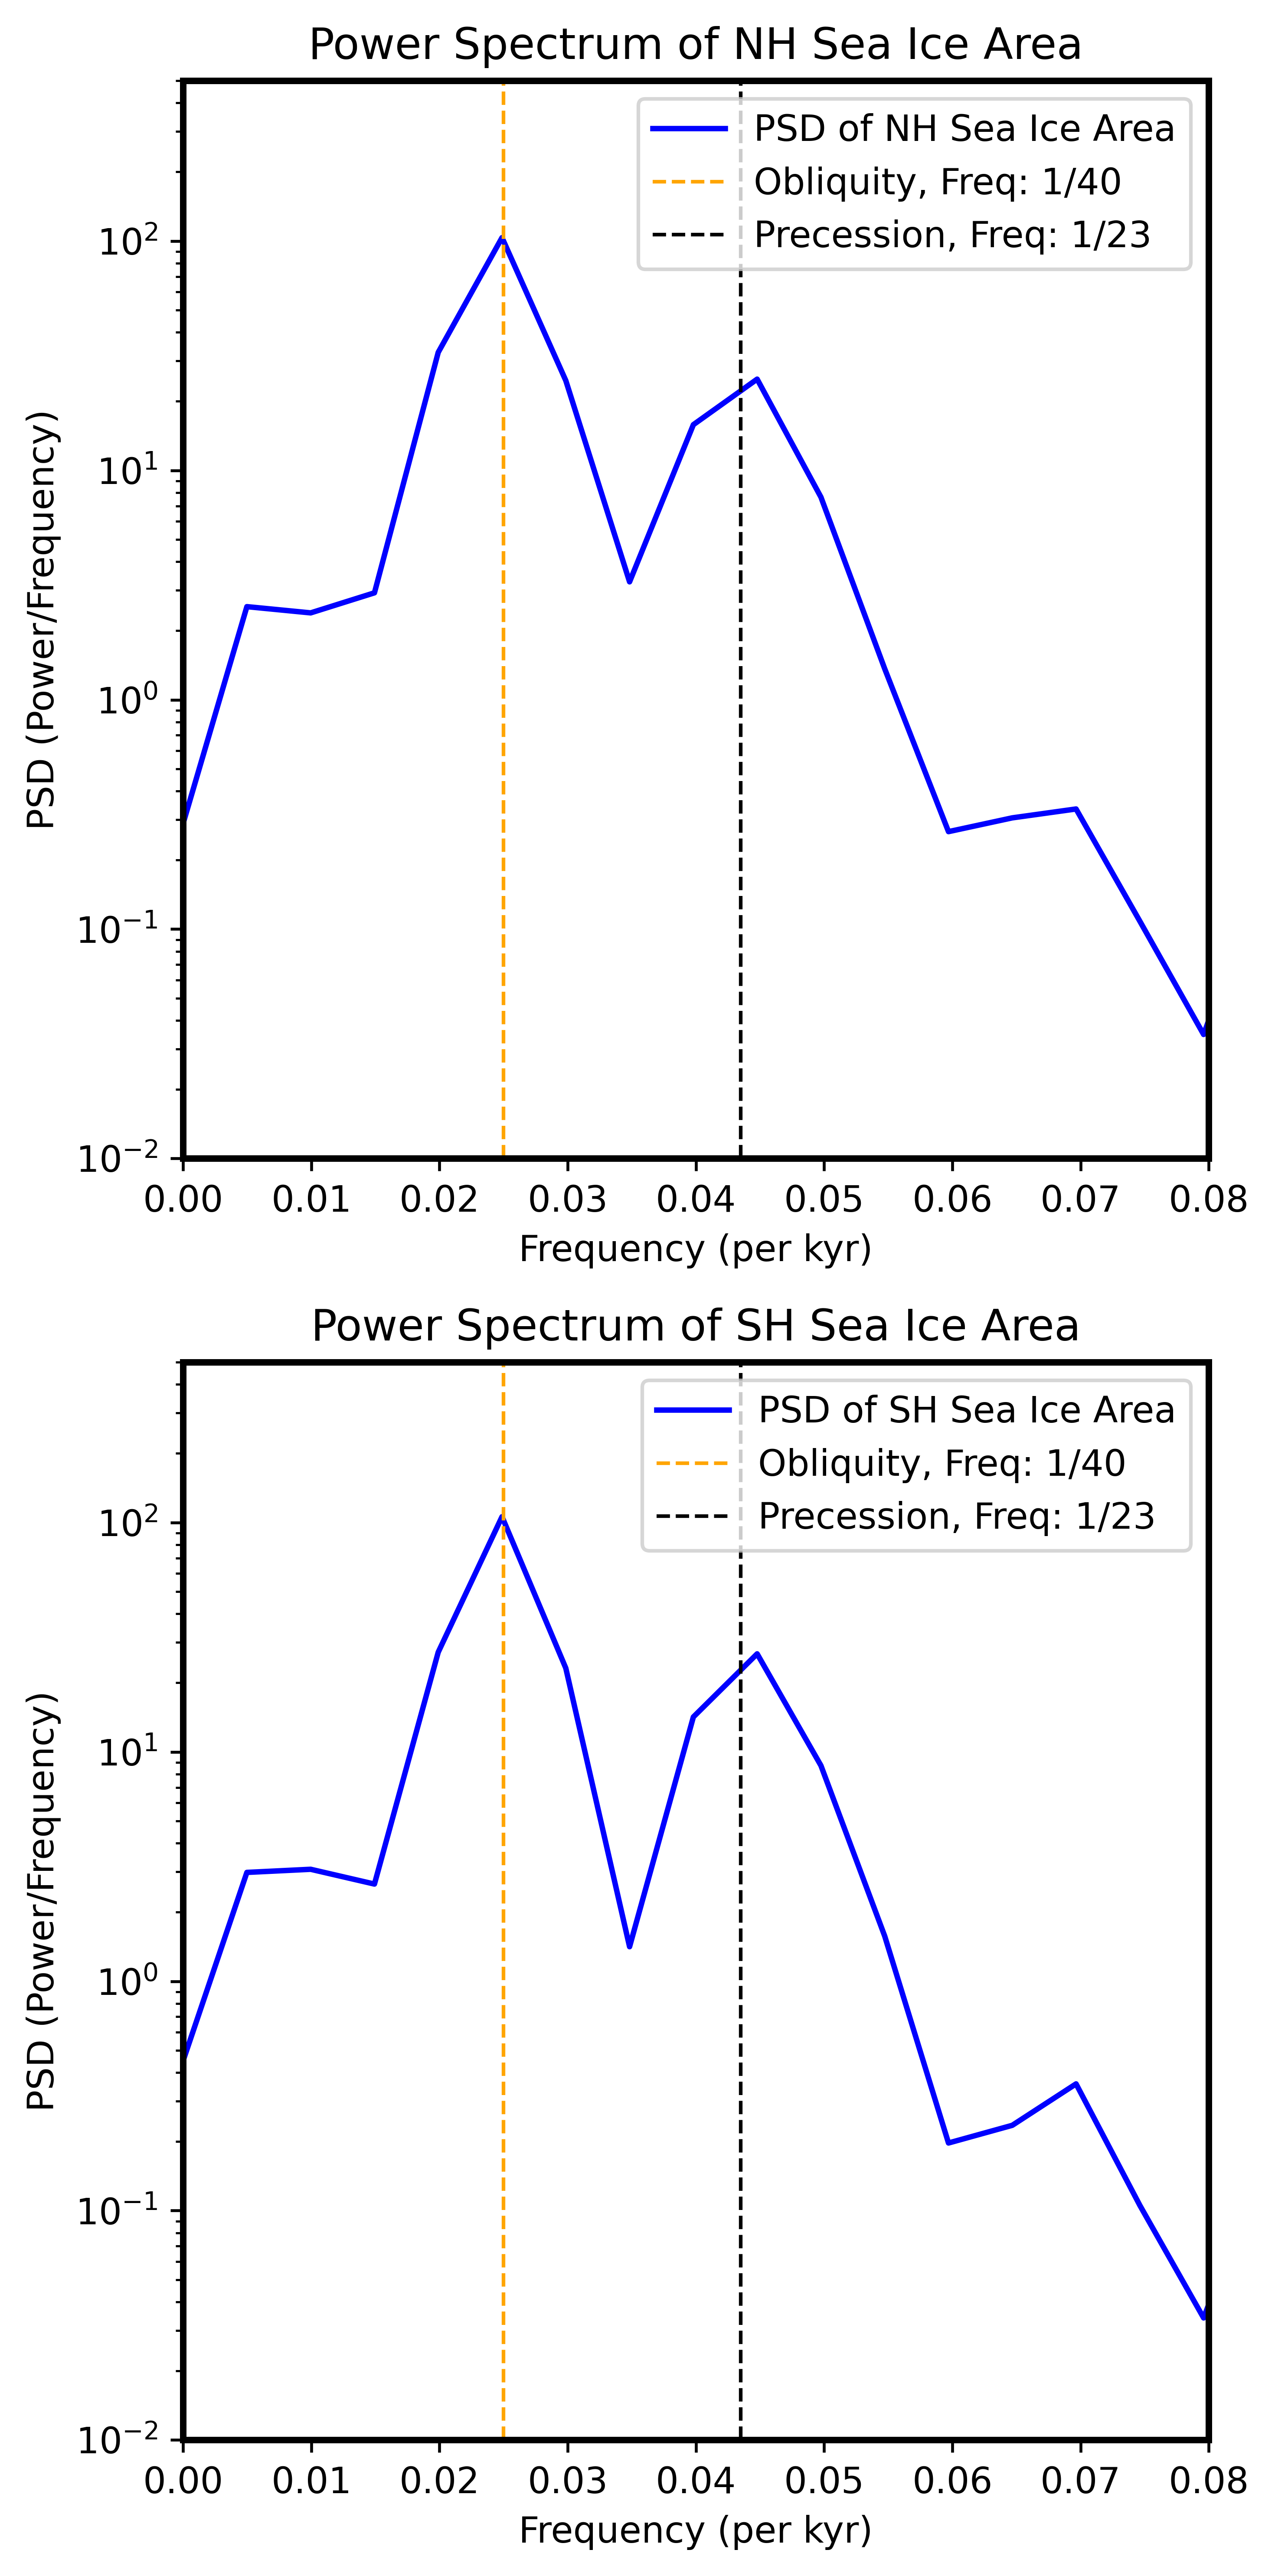

In [19]:
from scipy.signal import welch
from scipy.stats import zscore
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'results_nh_df' and 'results_sh_df' are defined elsewhere and contain the sea ice area data

# Setting the sampling frequency to 1 (assuming data points represent equal time intervals, e.g., kyr)
fs = 1  # Sampling frequency

# Using nperseg=100 for reasonable frequency resolution and averaging
nperseg = len(results_nh_df['iceA'])
# Setting noverlap to 50 for 50% overlap between segments
noverlap = 0

# Calculating power spectra for NH and SH sea ice areas using Welch's method
f_nh, Pxx_den_nh = welch(zscore(results_nh_df['iceA']), fs, nperseg=nperseg, noverlap=noverlap)
f_sh, Pxx_den_sh = welch(zscore(results_sh_df['iceA']), fs, nperseg=nperseg, noverlap=noverlap)

# Creating figure for the power spectra plots
fig, axs = plt.subplots(2,1, figsize=(5, 10),dpi=600)

# Plotting power spectrum for NH sea ice area on the left
axs[0].semilogy(f_nh, Pxx_den_nh, label='PSD of NH Sea Ice Area', color='blue')
axs[0].set_title('Power Spectrum of NH Sea Ice Area')
axs[0].set_xlabel('Frequency (per kyr)')
axs[0].set_ylabel('PSD (Power/Frequency)')
axs[0].set_xlim(0, 0.08)
# set ylim
axs[0].set_ylim(0.01,500)

# Adding vertical lines at specific frequencies

axs[0].axvline(x=1/40, color='orange', linestyle='--', linewidth=1, label='Obliquity, Freq: 1/40')
axs[0].axvline(x=1/23, color='k', linestyle='--', linewidth=1, label='Precession, Freq: 1/23')
axs[0].legend()

# # get the xticklabels and convert it to 1/xticklabels and set the xticklabels back
# xticks = axs[0].get_xticks()
# xticklabels = [1/x for x in xticks]
# axs[0].set_xticklabels(xticklabels)

# Plotting power spectrum for SH sea ice area on the right
axs[1].semilogy(f_sh, Pxx_den_sh, label='PSD of SH Sea Ice Area', color='blue')
axs[1].set_title('Power Spectrum of SH Sea Ice Area')
axs[1].set_xlabel('Frequency (per kyr)')
axs[1].set_ylabel('PSD (Power/Frequency)')
axs[1].set_xlim(0, 0.08)
# set ylim
axs[1].set_ylim(0.01,500)

# Adding vertical lines at specific frequencies
axs[1].axvline(x=1/40, color='orange', linestyle='--', linewidth=1, label='Obliquity, Freq: 1/40')
axs[1].axvline(x=1/23, color='k', linestyle='--', linewidth=1, label='Precession, Freq: 1/23')

# set the linewidth of boxes
for axis in ['top','bottom','left','right']:
  axs[0].spines[axis].set_linewidth(1.8)
  axs[1].spines[axis].set_linewidth(1.8)

axs[1].legend()

plt.tight_layout()
plt.show()


# Plot the Precession, Obliquity, sea ice data

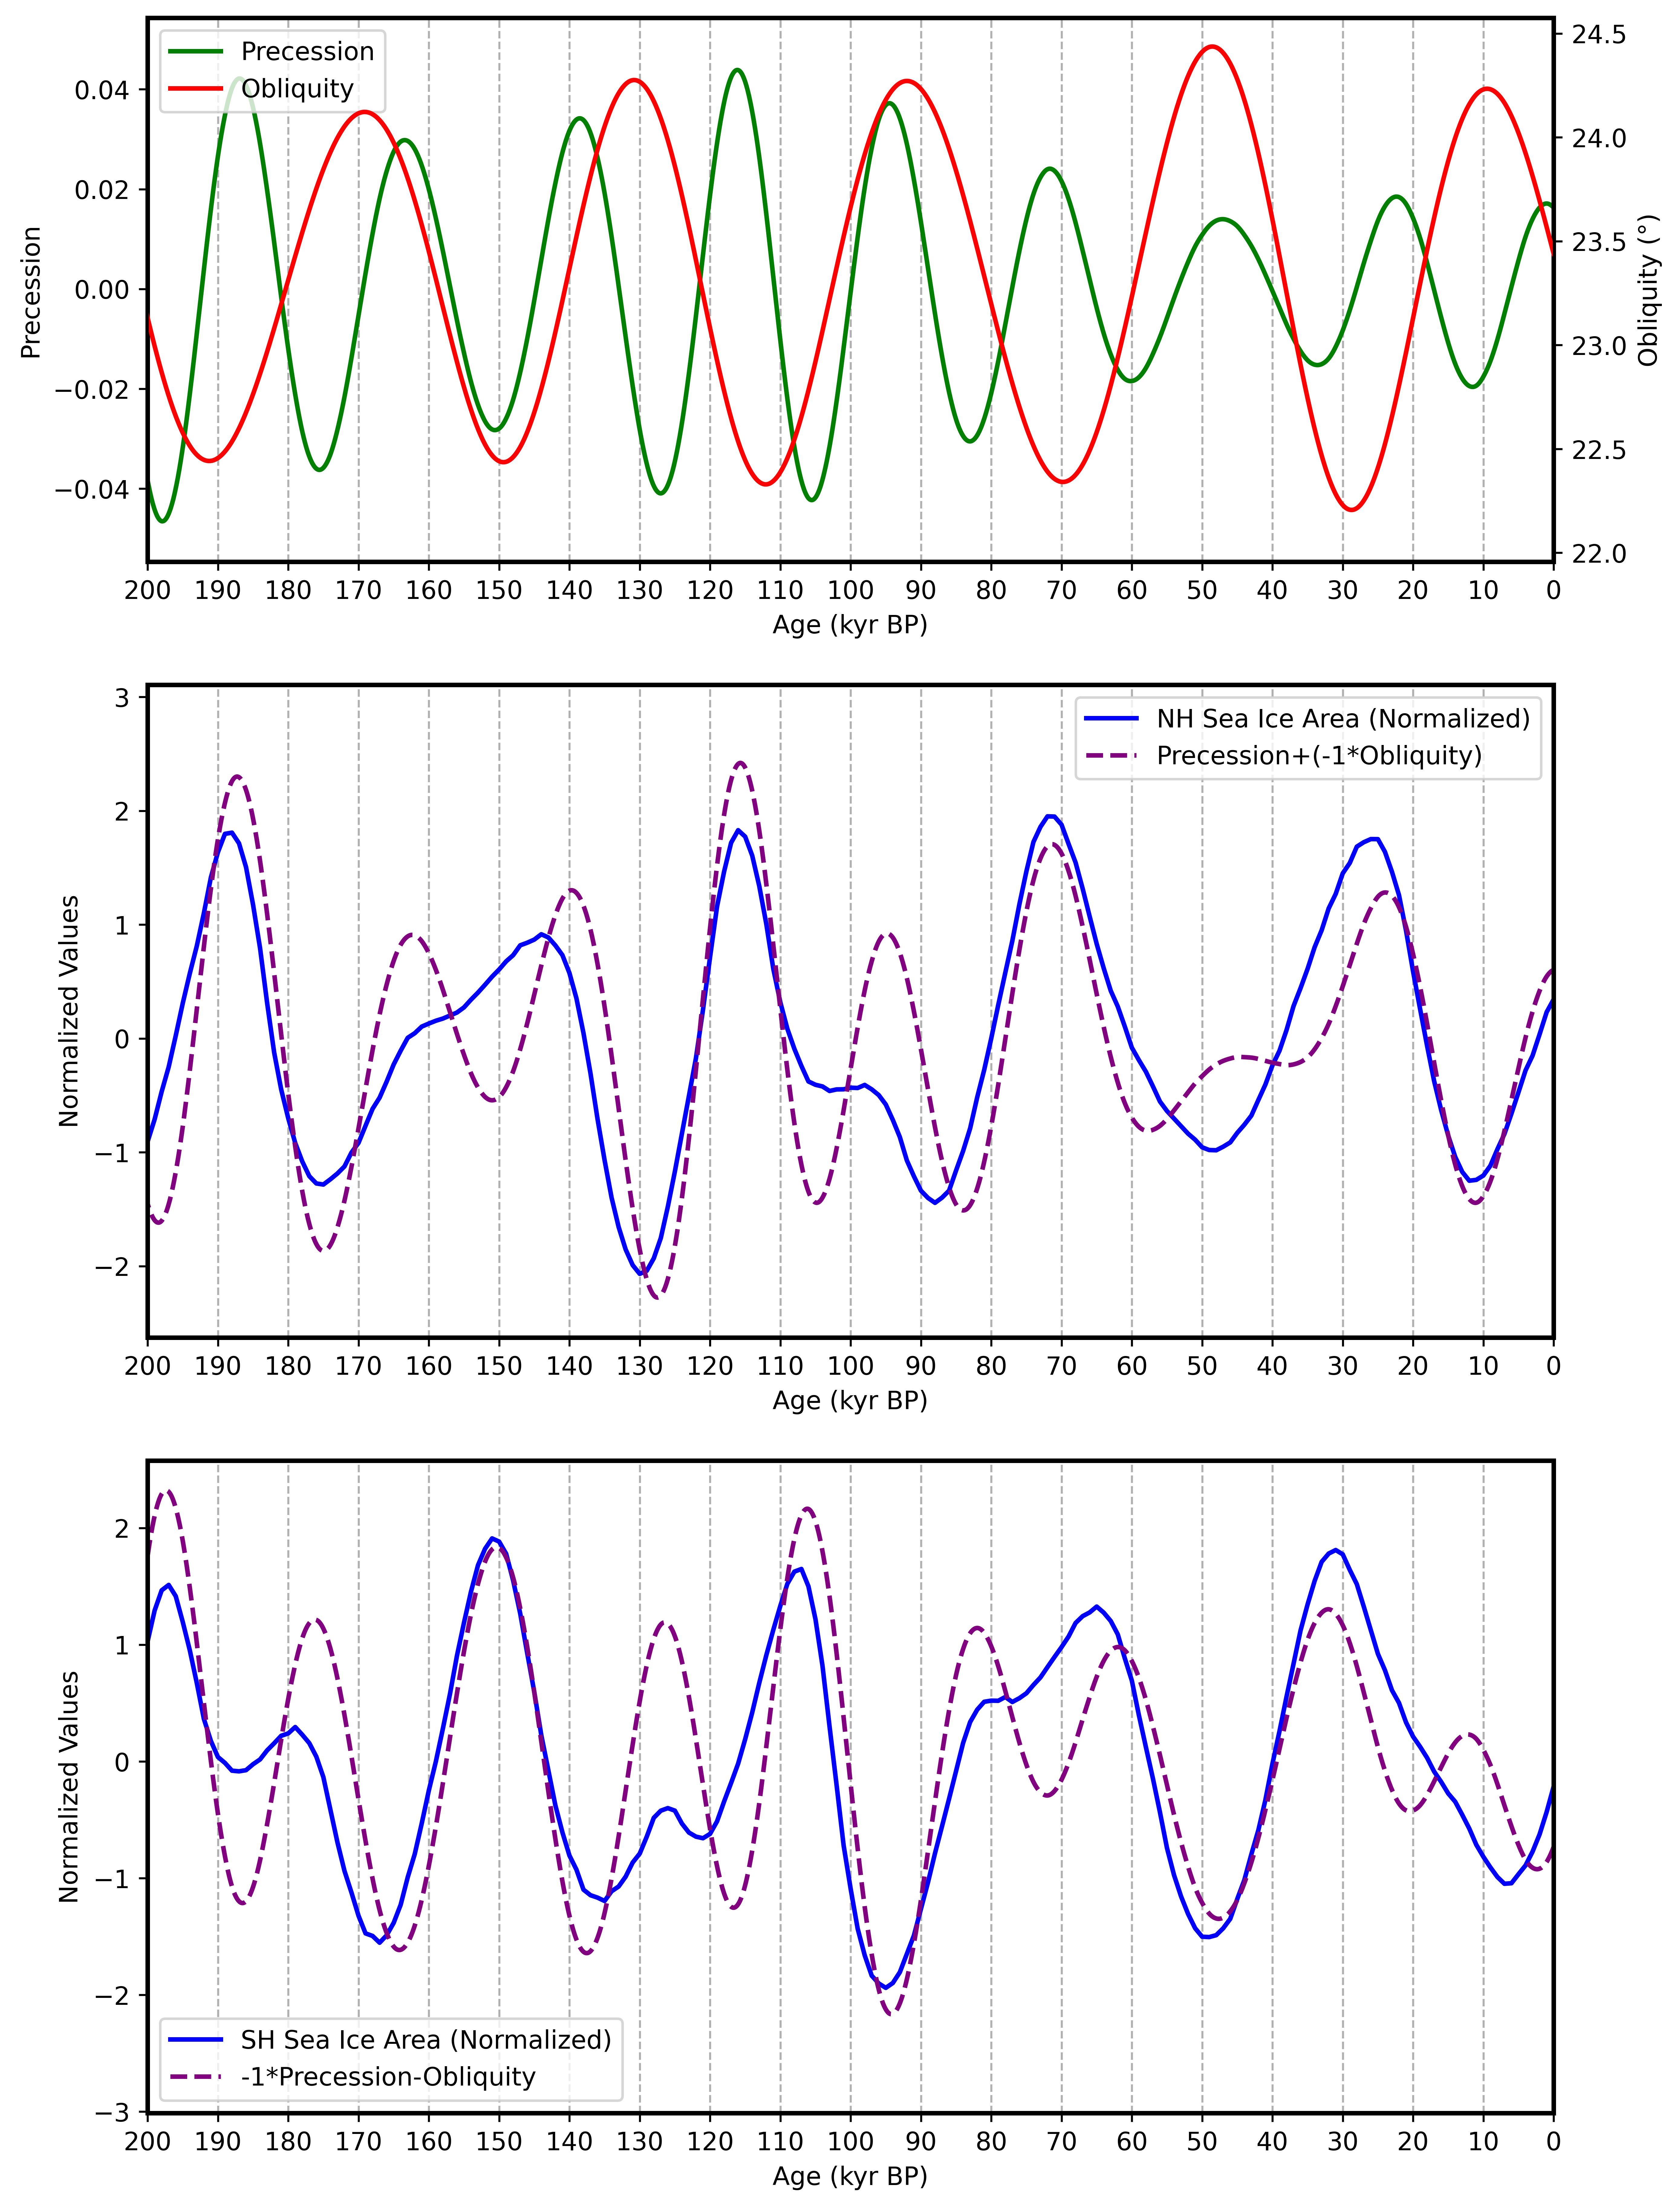

In [20]:
from scipy.stats import zscore
import matplotlib.pyplot as plt
import numpy as np



# Setting up figure and subplots with specified size and height ratios
fig, axs = plt.subplots(3, 1, figsize=(10, 15), dpi=600, gridspec_kw={'height_ratios': [1, 1.2, 1.2]})

# Plotting Precession and Obliquity in the first subplot with twin axis for obliquity
axs[0].plot(df_pre['age'], df_pre['pre'], label='Precession', linestyle='-', color='green', linewidth=1.8)
axs[0].plot(-10,0, label='Obliquity', linestyle='-', color='red', linewidth=1.8)
axs[0].set_xlabel('Age (kyr BP)')
axs[0].set_ylabel('Precession')
axs[0].legend(loc='upper left')
axs[0].set_xlim(0, 200)
axs[0].invert_xaxis()
axs[0].xaxis.set_major_locator(plt.MultipleLocator(10))  # Setting vertical grid starts from zero with a gap of 10
axs[0].grid(axis='x', which='major', linestyle='--')

ax2 = axs[0].twinx()
ax2.plot(df_obl['age'], np.rad2deg(df_obl['obl']), label='Obliquity (degrees)', linestyle='-', color='red', linewidth=1.8)
ax2.set_ylabel('Obliquity (°)')
# ax2.legend(loc='upper right')

# NH Sea Ice Area in the second subplot
axs[1].plot(results_nh_df['age'], zscore(results_nh_df['iceA']), label='NH Sea Ice Area (Normalized)', color='blue', linewidth=1.8)
axs[1].plot(df_pre['age'], zscore(df_pre['pre'] - df_obl['obl']), label='Precession+(-1*Obliquity)', linestyle='--', color='purple', linewidth=1.8)
axs[1].set_xlabel('Age (kyr BP)')
axs[1].set_ylabel('Normalized Values')
axs[1].legend()
axs[1].set_xlim(0, 200)
axs[1].invert_xaxis()
axs[1].xaxis.set_major_locator(plt.MultipleLocator(10))
axs[1].grid(axis='x', which='major', linestyle='--')

# SH Sea Ice Area in the third subplot
axs[2].plot(results_sh_df['age'], zscore(results_sh_df['iceA']), label='SH Sea Ice Area (Normalized)', color='blue', linewidth=1.8)
axs[2].plot(df_pre['age'], zscore(-df_pre['pre'] - df_obl['obl']), label='-1*Precession-Obliquity', linestyle='--', color='purple', linewidth=1.8)
axs[2].set_xlabel('Age (kyr BP)')
axs[2].set_ylabel('Normalized Values')
axs[2].legend()
axs[2].set_xlim(0, 200)
axs[2].invert_xaxis()
axs[2].xaxis.set_major_locator(plt.MultipleLocator(10))
axs[2].grid(axis='x', which='major', linestyle='--')

# set the linewidth of boxes to 1.8
for ax in axs:
    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(1.8)

# plt.tight_layout()
plt.show()


# Write a function to interpolate the orbital parameters as the same length and resolution as the sea ice data

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def orb_para_interpolation(age_sea_ice, precession, obliquity, variable_step=0.1, plot=False):
    # Crop and interpolate orbital parameters based on sea ice data's age axis
    precession_interp = np.interp(age_sea_ice, precession['age'], precession['pre'])
    obliquity_interp = np.interp(age_sea_ice, obliquity['age'], obliquity['obl'])

    if plot:
        # Plot cropped and interpolated orbital parameters along with sea ice curve
        plt.figure(figsize=(10, 6))
        plt.plot(age_sea_ice, precession_interp, label='Interpolated Precession', linestyle='--', color='green')
        plt.plot(age_sea_ice, obliquity_interp, label='Interpolated Obliquity', linestyle='--', color='red')
        plt.xlabel('Age (kyr BP)')
        plt.ylabel('Values')
        plt.title('Interpolated Orbital Parameters and Sea Ice Data')
        plt.legend()
        plt.grid(True)
        plt.show()
    
    return precession_interp, obliquity_interp

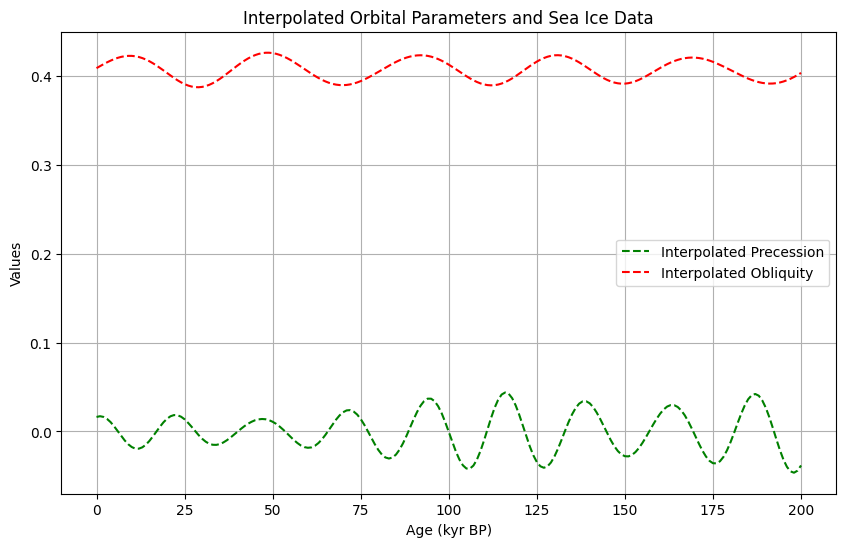

In [9]:
precession_interp, obliquity_interp = orb_para_interpolation(results_nh_df['age'], df_pre, df_obl, plot=True)

# Seach the coefficients for the linear combination of orbital parameters

In [10]:
import numpy as np

def find_linear_combination(precession, obliquity, sea_ice, variable_step=0.1):
    # Normalize sea ice curve and orbital parameters using zscore
    precession_norm = (precession - precession.mean()) / precession.std()
    obliquity_norm = (obliquity - obliquity.mean()) / obliquity.std()
    sea_ice_norm = (sea_ice - sea_ice.mean()) / sea_ice.std()
    
    min_rmsd = float('inf')
    best_coe_pre = None
    best_coe_obl = None
    
    for coe_pre in np.arange(-1, 1 + variable_step, variable_step):
        for coe_obl in np.arange(-1, 1 + variable_step, variable_step):
            linear_combination = coe_pre * precession_norm + coe_obl * obliquity_norm
            rmsd = np.sqrt(np.mean((linear_combination - sea_ice_norm)**2))
            if rmsd < min_rmsd:
                min_rmsd = rmsd
                best_coe_pre = coe_pre
                best_coe_obl = coe_obl
    
    return best_coe_pre, best_coe_obl


In [11]:
from scipy.stats import zscore
# Calculate coefficients for NH sea ice
coe_pre_nh, coe_obl_nh = find_linear_combination(precession_interp, obliquity_interp, zscore(results_nh_df['iceA']))

# Calculate coefficients for SH sea ice
coe_pre_sh, coe_obl_sh = find_linear_combination(precession_interp, obliquity_interp, zscore(results_sh_df['iceA']))


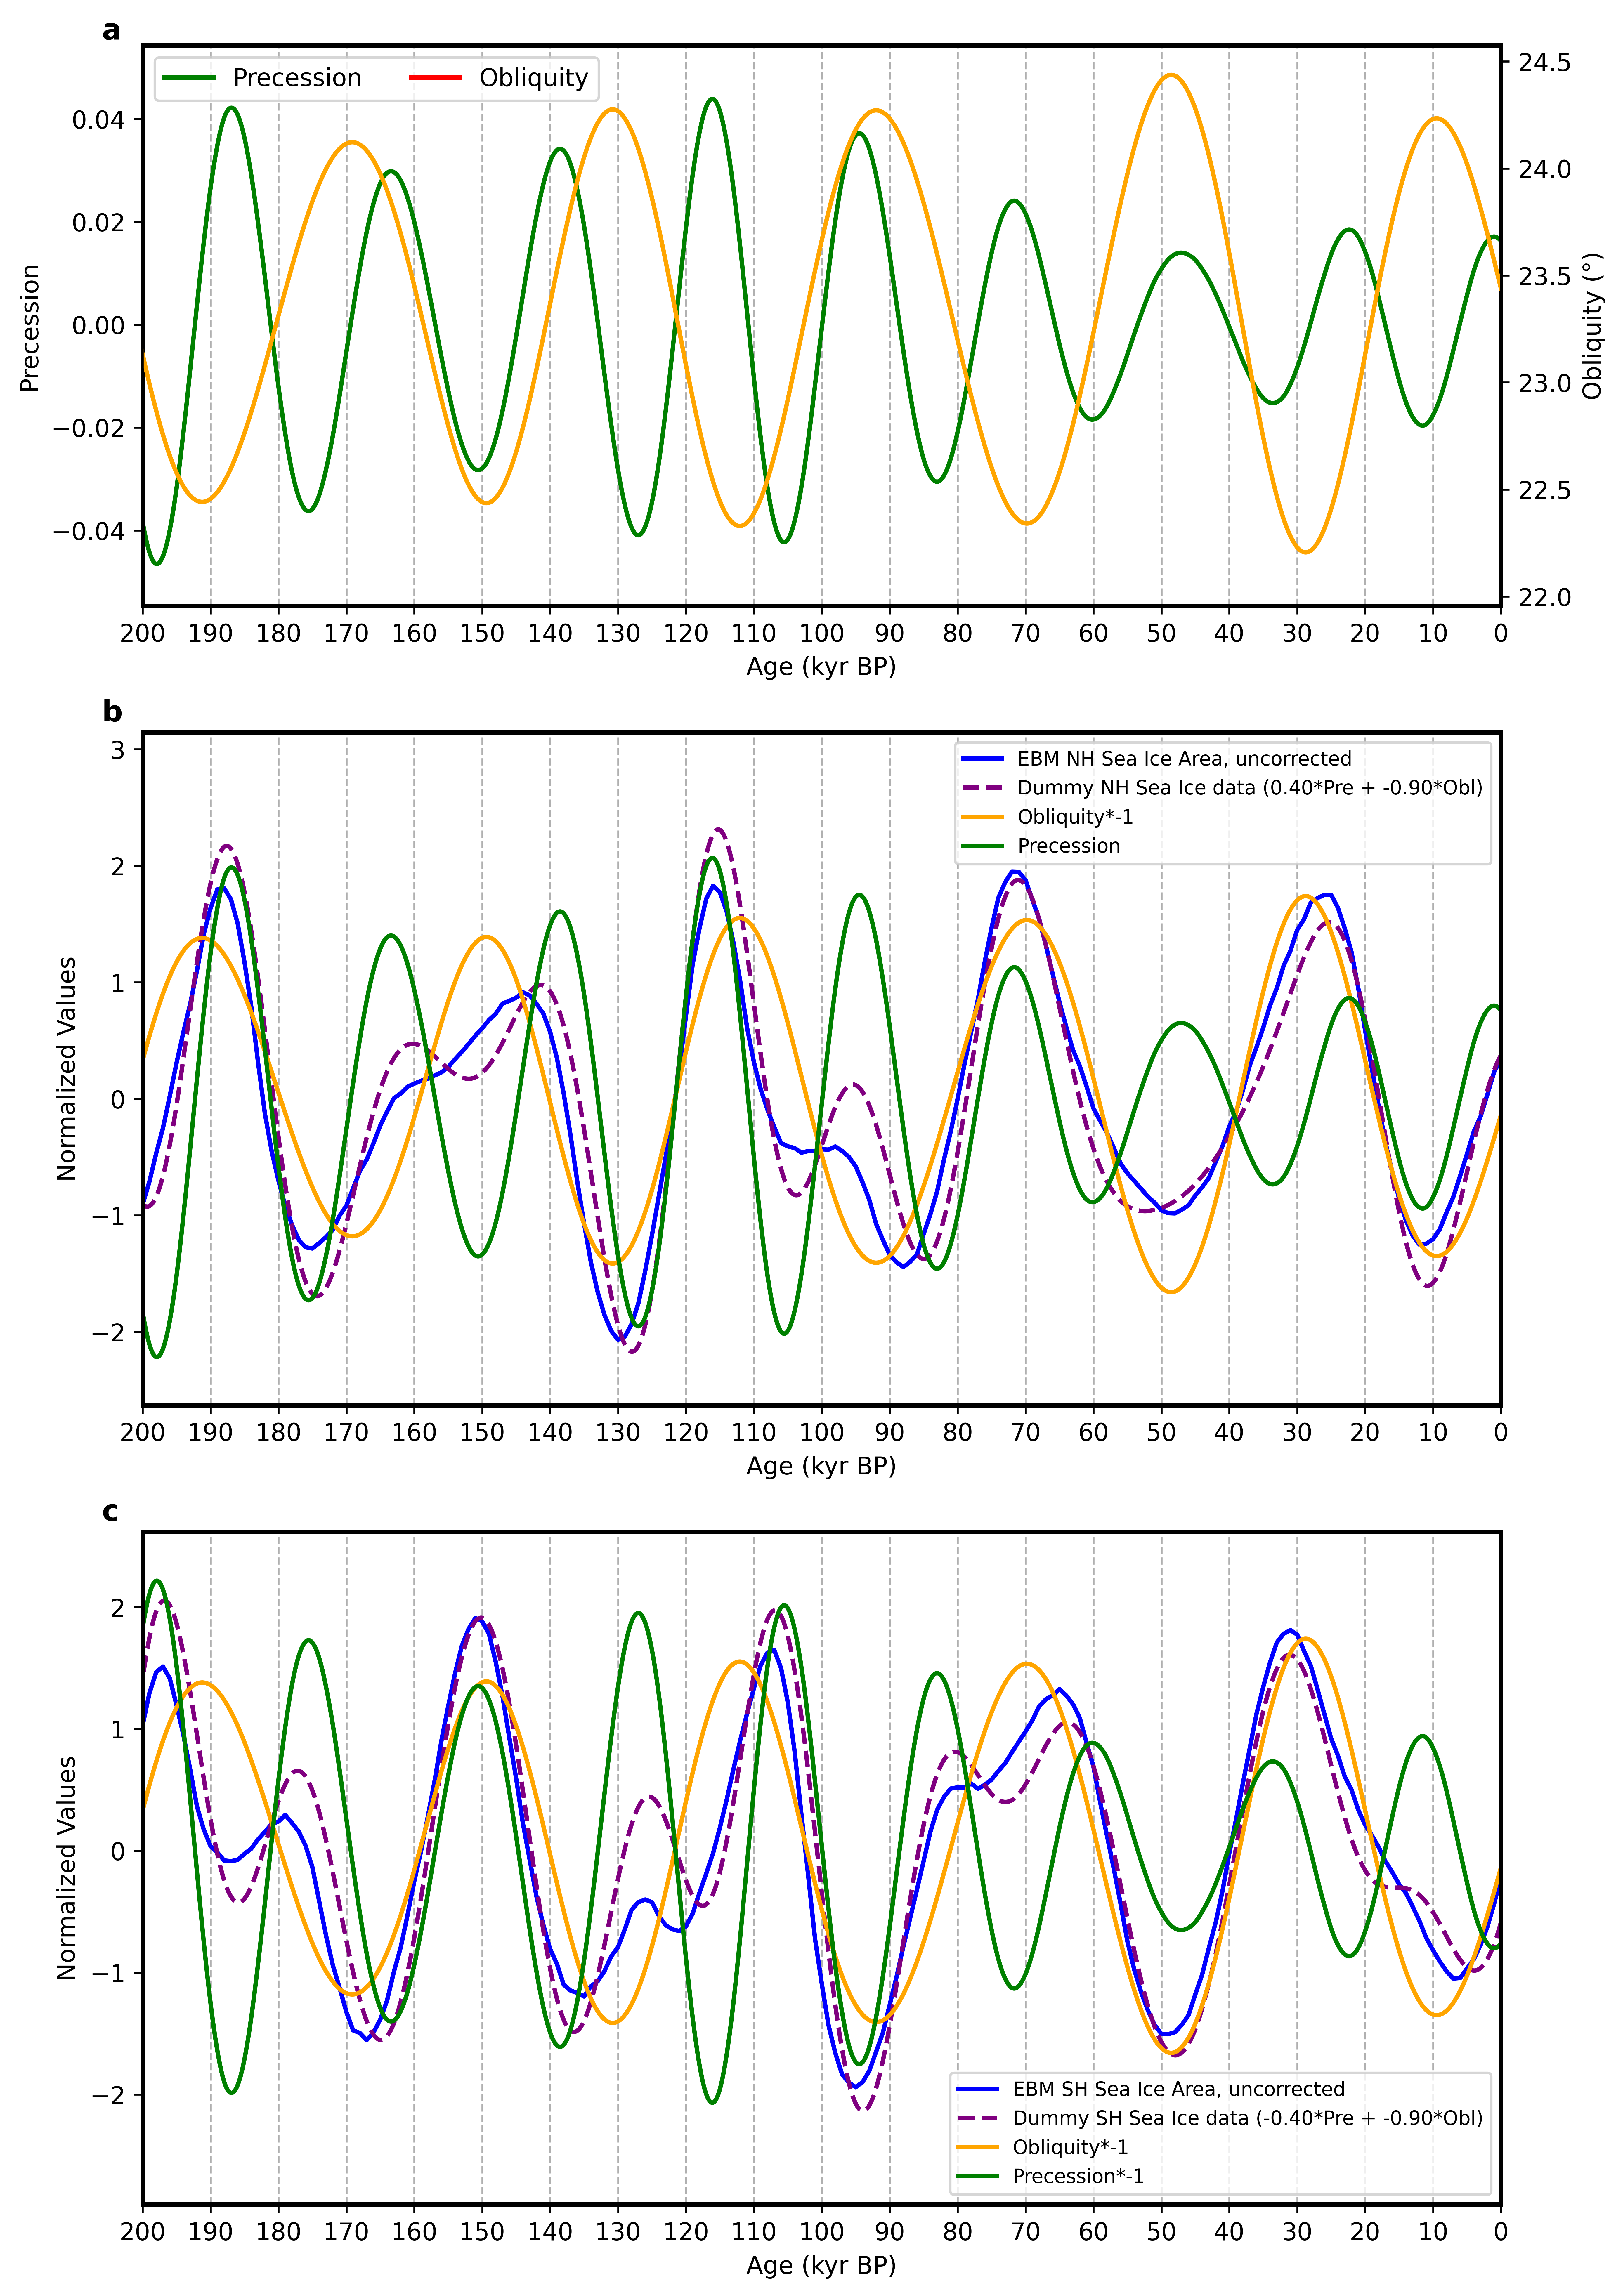

In [15]:
from scipy.stats import zscore
import matplotlib.pyplot as plt
import numpy as np

# Calculate linear combination of precession and obliquity for NH and SH sea ice
linear_comb_nh = coe_pre_nh * df_pre['pre'] + coe_obl_nh * df_obl['obl']
linear_comb_sh = coe_pre_sh * df_pre['pre'] + coe_obl_sh * df_obl['obl']

# Setting up figure and subplots with specified size and height ratios
fig, axs = plt.subplots(3, 1, figsize=(10, 16), dpi=600, gridspec_kw={'height_ratios': [1, 1.2, 1.2]})

# Plotting Precession and Obliquity in the first subplot with twin axis for obliquity
axs[0].plot(df_pre['age'], df_pre['pre'], label='Precession', linestyle='-', color='green', linewidth=1.8)
axs[0].plot(-10,0, label='Obliquity', linestyle='-', color='red', linewidth=1.8)
axs[0].set_xlabel('Age (kyr BP)')
axs[0].set_ylabel('Precession')
# axs[0].legend(loc='upper left')
# set the column of leggend to be two
axs[0].legend(loc='upper left', ncol=2)

axs[0].set_xlim(0, 200)
axs[0].invert_xaxis()
axs[0].xaxis.set_major_locator(plt.MultipleLocator(10))  # Setting vertical grid starts from zero with a gap of 10
axs[0].grid(axis='x', which='major', linestyle='--')

ax2 = axs[0].twinx()
ax2.plot(df_obl['age'], np.rad2deg(df_obl['obl']), label='Obliquity (degrees)', linestyle='-', color='orange', linewidth=1.8)
ax2.set_ylabel('Obliquity (°)')

# NH Sea Ice Area in the second subplot
axs[1].plot(results_nh_df['age'], zscore(results_nh_df['iceA']), label='EBM NH Sea Ice Area, uncorrected', color='blue', linewidth=1.8)
axs[1].plot(df_pre['age'], zscore(linear_comb_nh), label=f'Dummy NH Sea Ice data ({coe_pre_nh:.2f}*Pre + {coe_obl_nh:.2f}*Obl)', linestyle='--', color='purple', linewidth=1.8)
# plot obl
axs[1].plot(df_obl['age'], -zscore(df_obl['obl']), label='Obliquity*-1', linestyle='-', color='orange', linewidth=1.8)
#plot pre
axs[1].plot(df_pre['age'], zscore(df_pre['pre']), label='Precession', linestyle='-', color='green', linewidth=1.8)
axs[1].set_xlabel('Age (kyr BP)')
axs[1].set_ylabel('Normalized Values')
# add legend and set the font size to 8
axs[1].legend(fontsize=8)
axs[1].set_xlim(0, 200)
axs[1].invert_xaxis()
axs[1].xaxis.set_major_locator(plt.MultipleLocator(10))
axs[1].grid(axis='x', which='major', linestyle='--')

# SH Sea Ice Area in the third subplot
axs[2].plot(results_sh_df['age'], zscore(results_sh_df['iceA']), label='EBM SH Sea Ice Area, uncorrected', color='blue', linewidth=1.8)
axs[2].plot(df_pre['age'], zscore(linear_comb_sh), label=f'Dummy SH Sea Ice data ({coe_pre_sh:.2f}*Pre + {coe_obl_sh:.2f}*Obl)', linestyle='--', color='purple', linewidth=1.8)
# plot obl
axs[2].plot(df_obl['age'], -zscore(df_obl['obl']), label='Obliquity*-1', linestyle='-', color='orange', linewidth=1.8)
#plot pre
axs[2].plot(df_pre['age'], -zscore(df_pre['pre']), label='Precession*-1', linestyle='-', color='green', linewidth=1.8)
axs[2].set_xlabel('Age (kyr BP)')
axs[2].set_ylabel('Normalized Values')
axs[2].legend(fontsize=8)
axs[2].set_xlim(0, 200)
axs[2].invert_xaxis()
axs[2].xaxis.set_major_locator(plt.MultipleLocator(10))
axs[2].grid(axis='x', which='major', linestyle='--')

# set the linewidth of boxes to 1.8
for ax in axs:
    for axis in ['top', 'bottom', 'left', 'right']:
        ax.spines[axis].set_linewidth(1.8)

# add text a, b and c to the subplots
axs[0].text(-0.03, 1.05, 'a', transform=axs[0].transAxes, fontsize=12, fontweight='bold', va='top')
axs[1].text(-0.03, 1.05, 'b', transform=axs[1].transAxes, fontsize=12, fontweight='bold', va='top')
axs[2].text(-0.03, 1.05, 'c', transform=axs[2].transAxes, fontsize=12, fontweight='bold', va='top')


plt.show()


# Cross Spectrum Anlysis

c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\scipy\signal\_spectral_py.py:2014: UserWarning: nperseg = 256 is greater than input length  = 201, using nperseg = 201
  warnings.warn('nperseg = {0:d} is greater than input length '


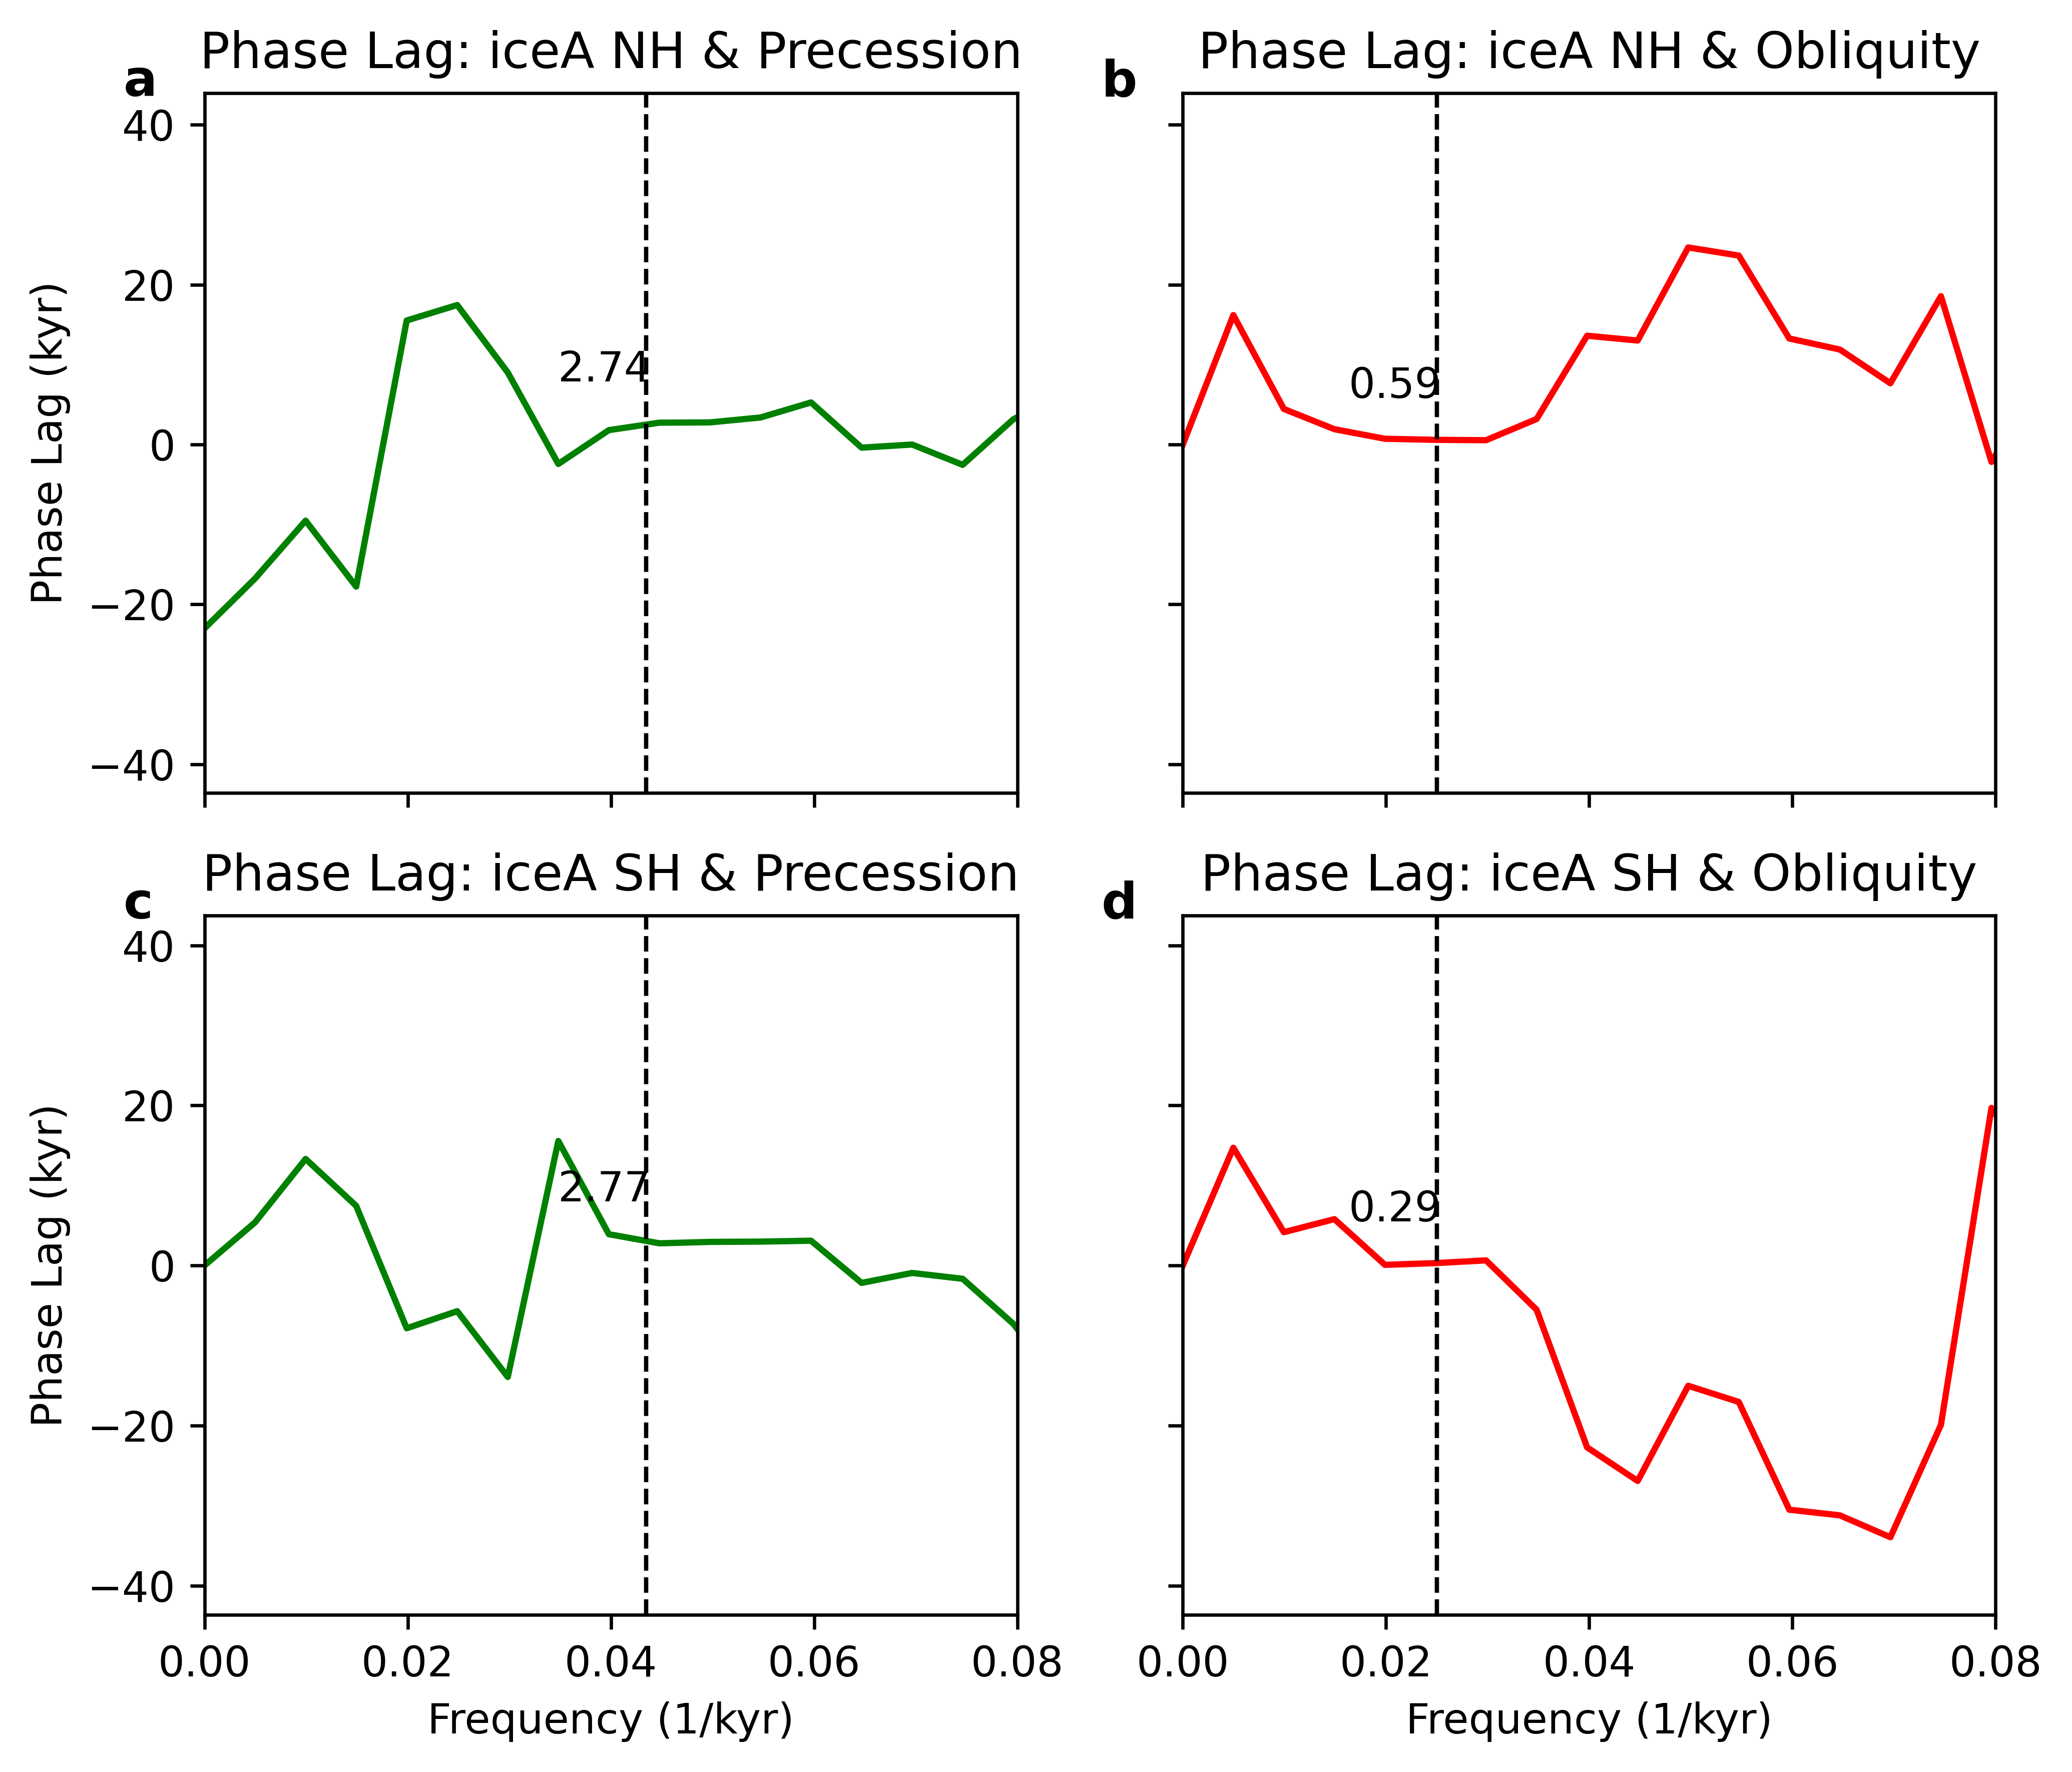

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import csd,coherence
from scipy.stats import zscore

# Since NH data is not provided, using SH data as placeholder for demonstration
iceA_nh = zscore(results_nh_df['iceA'].values)  # Placeholder for NH iceA data
iceA_sh = zscore(results_sh_df['iceA'].values)
precession = zscore(precession_interp)
obliquity = zscore(obliquity_interp)

fs = 1  # Sample frequency in samples per year

freq, Cxy_pre_nh = coherence(iceA_nh, precession, fs=fs)

# Calculate phase lag for NH vs. precession and obliquity (using SH data as placeholder)
_, Pxy_pre_nh = csd(iceA_nh, precession, fs=fs)
phase_lag_pre_nh = np.degrees(np.angle(Pxy_pre_nh)) * 23 / (180)

_, Pxy_obl_nh = csd(iceA_nh, -obliquity, fs=fs)
phase_lag_obl_nh =  np.degrees(np.angle(Pxy_obl_nh)) * 40 / (180)

# Calculate phase lag for SH vs. precession and obliquity
_, Pxy_pre_sh = csd(iceA_sh, -precession, fs=fs)
phase_lag_pre_sh =  np.degrees(np.angle(Pxy_pre_sh)) * 23 / (180)

_, Pxy_obl_sh = csd(iceA_sh, -obliquity, fs=fs)
phase_lag_obl_sh = np.degrees(np.angle(Pxy_obl_sh) )* 40 / (180)


# Function to find closest index in an array to a given value
def find_nearest(array, value):
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    return idx

# Sample the data at specific frequencies
precession_freq = 1/23
obliquity_freq = 1/40

# Find nearest frequency index for the vertical lines
idx_precession = find_nearest(freq, precession_freq)
idx_obliquity = find_nearest(freq, obliquity_freq)


# Plotting phase lags
fig, axs = plt.subplots(2, 2, figsize=(7, 6), sharex='col', sharey='row', dpi=600)

# NH vs. Precession
axs[0, 0].plot(freq, phase_lag_pre_nh, color='green')
axs[0, 0].set_title('Phase Lag: iceA NH & Precession')
axs[0, 0].set_ylabel('Phase Lag (kyr)')
axs[0, 0].axvline(x=1/23, color='k', linestyle='--', linewidth=1, label='Precession, Freq: 1/23')
# set xlim
axs[0, 0].set_xlim(0, 0.08)
axs[0, 0].axvline(x=precession_freq, color='k', linestyle='--', linewidth=1)
axs[0, 0].annotate(f'{phase_lag_pre_nh[idx_precession]:.2f}', (precession_freq, phase_lag_pre_nh[idx_precession]), textcoords="offset points", xytext=(-10,10), ha='center')


# NH vs. Obliquity
axs[0, 1].plot(freq, phase_lag_obl_nh, color='red')
axs[0, 1].set_title('Phase Lag: iceA NH & Obliquity')
axs[0, 1].axvline(x=1/40, color='k', linestyle='--', linewidth=1, label='Obliquity, Freq: 1/40')
# set xlim
axs[0, 1].set_xlim(0, 0.08)
axs[0, 1].axvline(x=obliquity_freq, color='k', linestyle='--', linewidth=1)
axs[0, 1].annotate(f'{phase_lag_obl_nh[idx_obliquity]:.2f}', (obliquity_freq, phase_lag_obl_nh[idx_obliquity]), textcoords="offset points", xytext=(-10,10), ha='center')


# SH vs. Precession
axs[1, 0].plot(freq, phase_lag_pre_sh, color='green')
axs[1, 0].set_title('Phase Lag: iceA SH & Precession')
axs[1, 0].set_xlabel('Frequency (1/kyr)')
axs[1, 0].set_ylabel('Phase Lag (kyr)')
axs[1, 0].axvline(x=1/23, color='k', linestyle='--', linewidth=1, label='Precession, Freq: 1/23')
# set xlim
axs[1, 0].set_xlim(0, 0.08)
axs[1, 0].axvline(x=precession_freq, color='k', linestyle='--', linewidth=1)
axs[1, 0].annotate(f'{phase_lag_pre_sh[idx_precession]:.2f}', (precession_freq, phase_lag_pre_sh[idx_precession]), textcoords="offset points", xytext=(-10,10), ha='center')


# SH vs. Obliquity
axs[1, 1].plot(freq, phase_lag_obl_sh, color='red')
axs[1, 1].set_title('Phase Lag: iceA SH & Obliquity')
axs[1, 1].set_xlabel('Frequency (1/kyr)')
axs[1, 1].axvline(x=1/40, color='k', linestyle='--', linewidth=1, label='Obliquity, Freq: 1/40')
# set xlim
axs[1, 1].set_xlim(0, 0.08)
axs[1, 1].axvline(x=obliquity_freq, color='k', linestyle='--', linewidth=1)
axs[1, 1].annotate(f'{phase_lag_obl_sh[idx_obliquity]:.2f}', (obliquity_freq, phase_lag_obl_sh[idx_obliquity]), textcoords="offset points", xytext=(-10,10), ha='center')

# add text a, b, c and d to the subplots
axs[0, 0].text(-0.1, 1.05, 'a', transform=axs[0, 0].transAxes, fontsize=12, fontweight='bold', va='top')
axs[0, 1].text(-0.1, 1.05, 'b', transform=axs[0, 1].transAxes, fontsize=12, fontweight='bold', va='top')
axs[1, 0].text(-0.1, 1.05, 'c', transform=axs[1, 0].transAxes, fontsize=12, fontweight='bold', va='top')
axs[1, 1].text(-0.1, 1.05, 'd', transform=axs[1, 1].transAxes, fontsize=12, fontweight='bold', va='top')

plt.tight_layout()
plt.show()


c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\scipy\signal\_spectral_py.py:2014: UserWarning: nperseg = 256 is greater than input length  = 201, using nperseg = 201
  warnings.warn('nperseg = {0:d} is greater than input length '


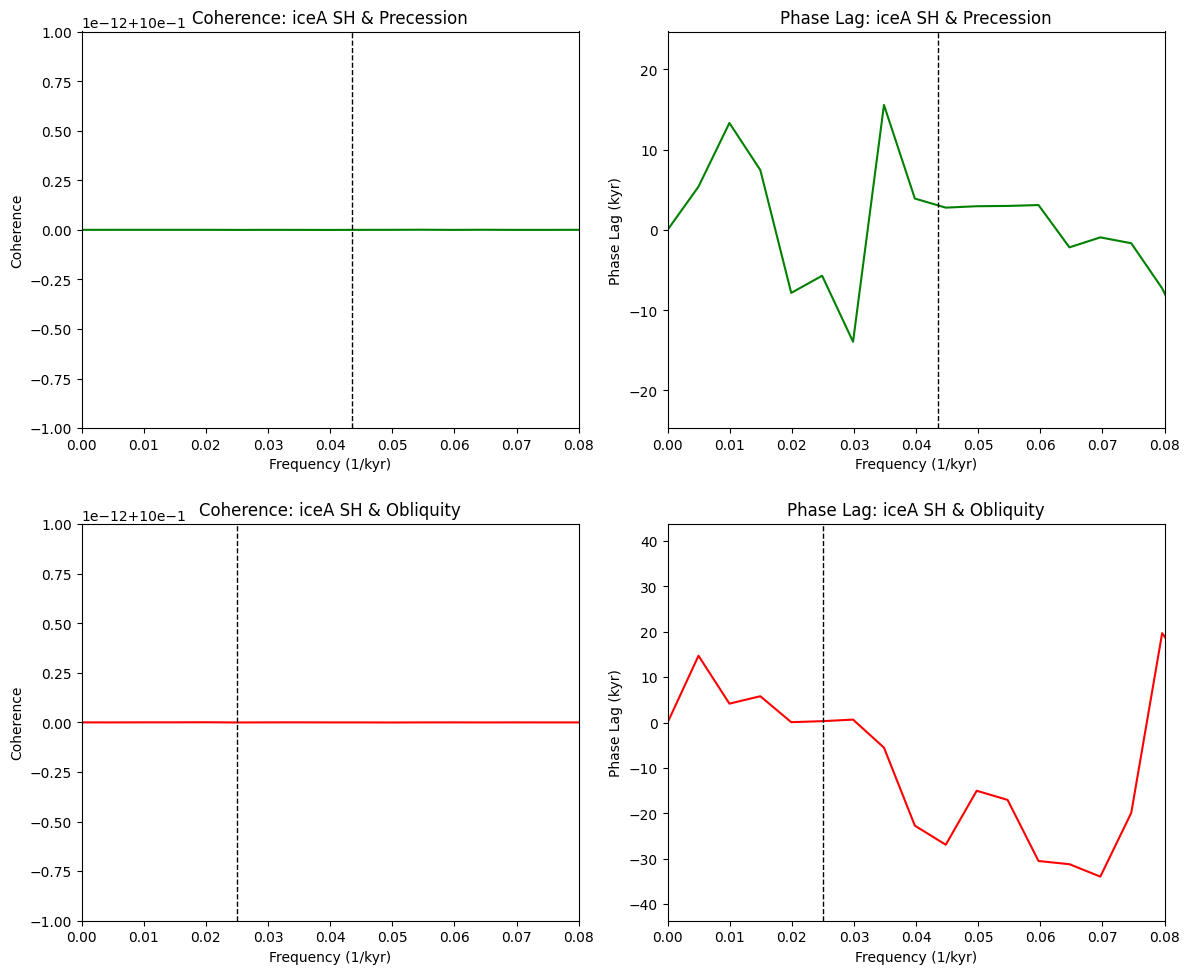

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import csd, coherence
from scipy.stats import zscore


# age_sea_ice = results_sh_df['age'].values
iceA_sh = zscore(results_sh_df['iceA'].values)
precession = zscore(precession_interp)
obliquity = zscore(obliquity_interp)


fs = 1  # Sample frequency in samples per year, adjust according to your data

# Calculate coherence and phase lag between iceA and precession
freq, Cxy_pre = coherence(iceA_sh, -precession, fs=fs)
_, Pxy_pre = csd(iceA_sh, -precession, fs=fs)
phase_lag_pre = np.angle(Pxy_pre)
# convert the phase lag to years
phase_lag_pre=np.degrees(phase_lag_pre)*23/(180)

# Calculate coherence and phase lag between iceA and obliquity
_, Cxy_obl = coherence(iceA_sh, -obliquity, fs=fs)
_, Pxy_obl = csd(iceA_sh, -obliquity, fs=fs)
phase_lag_obl = np.angle(Pxy_obl)
# convert the phase lag to years
phase_lag_obl=np.degrees(phase_lag_obl)*40/(180)

# Plotting
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Coherence between iceA and precession
axs[0, 0].plot(freq, Cxy_pre, color='green')
axs[0, 0].set_title('Coherence: iceA SH & Precession')
axs[0, 0].set_xlabel('Frequency (1/kyr)')
axs[0, 0].set_ylabel('Coherence')
#set xlim
axs[0, 0].set_xlim(0,0.08)
# PLOT A vertical line at the frequency of 1/23
axs[0, 0].axvline(x=1/23, color='k', linestyle='--', linewidth=1, label='Precession, Freq: 1/23')

# Phase lag between iceA and precession
# axs[0, 1].plot(freq, np.degrees(phase_lag_pre), color='green')
axs[0, 1].plot(freq, phase_lag_pre, color='green')
axs[0, 1].set_title('Phase Lag: iceA SH & Precession')
axs[0, 1].set_xlabel('Frequency (1/kyr)')
axs[0, 1].set_ylabel('Phase Lag (kyr)')
#set xlim
axs[0, 1].set_xlim(0,0.08)
# PLOT A vertical line at the frequency of 1/23
axs[0, 1].axvline(x=1/23, color='k', linestyle='--', linewidth=1, label='Precession, Freq: 1/23')

# Coherence between iceA and obliquity
axs[1, 0].plot(freq, Cxy_obl, color='red')
axs[1, 0].set_title('Coherence: iceA SH & Obliquity')
axs[1, 0].set_xlabel('Frequency (1/kyr)')
axs[1, 0].set_ylabel('Coherence')
#set xlim
axs[1, 0].set_xlim(0,0.08)
# PLOT A vertical line at the frequency of 1/40
axs[1, 0].axvline(x=1/40, color='k', linestyle='--', linewidth=1, label='Obliquity, Freq: 1/40')

# Phase lag between iceA and obliquity
# axs[1, 1].plot(freq, np.degrees(phase_lag_obl), color='red')
axs[1, 1].plot(freq, phase_lag_obl, color='red')
axs[1, 1].set_title('Phase Lag: iceA SH & Obliquity')
axs[1, 1].set_xlabel('Frequency (1/kyr)')
axs[1, 1].set_ylabel('Phase Lag (kyr)')
#set xlim
axs[1, 1].set_xlim(0,0.08)
# PLOT A vertical line at the frequency of 1/40
axs[1, 1].axvline(x=1/40, color='k', linestyle='--', linewidth=1, label='Obliquity, Freq: 1/40')

plt.tight_layout()
plt.show()
